In [1]:
#Import Libraries
import cudf as pd
import cupy as cp
from cuml.linear_model import LogisticRegression
from cuml.multiclass import MulticlassClassifier
from cuml.multiclass import OneVsRestClassifier
from cuml.datasets.classification import make_classification
from cuml.metrics.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
!pip install ipyplot &> /dev/null
print ("ipyplot installed sucessfully!!")
import matplotlib.pyplot as plt
import ipyplot

ipyplot installed sucessfully!!


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(len(x_train))
print(len(x_test))

60000
10000


In [4]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)



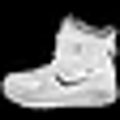
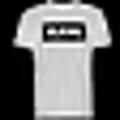
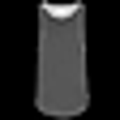
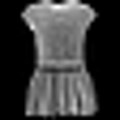
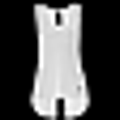
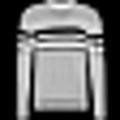
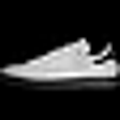
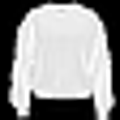
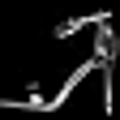
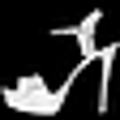
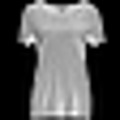
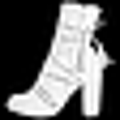
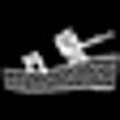
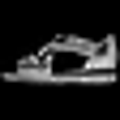
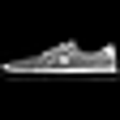
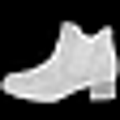
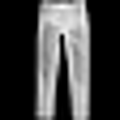
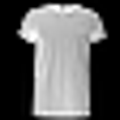


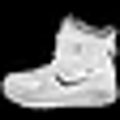
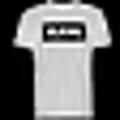
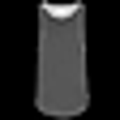
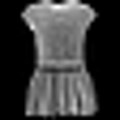
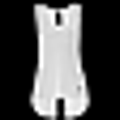
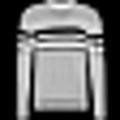
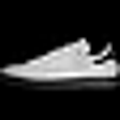
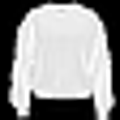
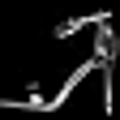
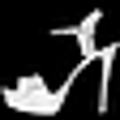
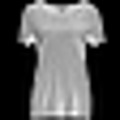
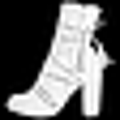
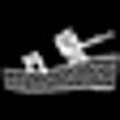
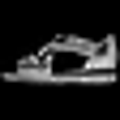
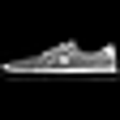
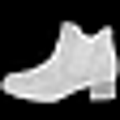
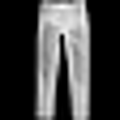
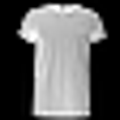

In [5]:
ipyplot.plot_images(x_train, max_images=18, img_width=120)

In [6]:
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
print(y_train.shape)
print(y_test.shape)

(60000, 1)
(10000, 1)


In [8]:
num_labels = len(cp.unique(y_train))
print("Number Of Labels:",num_labels)

Number Of Labels: 10


In [9]:
cls = OneVsRestClassifier(LogisticRegression())
cls.fit(x_train.astype('float32'),y_train.astype('float32'))

[W] [05:37:19.068149] L-BFGS: max iterations reached
[W] [05:37:19.068491] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [05:37:20.601575] L-BFGS: max iterations reached
[W] [05:37:20.605196] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [05:37:22.267793] L-BFGS: max iterations reached
[W] [05:37:22.268705] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [05:37:23.809636] L-BFGS: max iterations reached
[W] [05:37:23.810319] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

OneVsRestClassifier()

In [10]:
y_pred = cls.predict(x_test.astype('float32'))

In [11]:
print(y_pred)
print(type(y_pred))

[9. 2. 1. ... 8. 1. 5.]
<class 'numpy.ndarray'>


In [12]:
y_test = y_test.reshape(1,len(y_test))[0]
print(y_test)
print(type(y_test))

[9 2 1 ... 8 1 5]
<class 'numpy.ndarray'>


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [14]:
accuracy_score(y_test,y_pred)

0.837

In [15]:
confusion_matrix(y_test,y_pred)

array([[814,   7,  12,  54,  10,   0,  89,   0,  13,   1],
       [  4, 952,   7,  27,   3,   0,   2,   1,   4,   0],
       [ 21,   5, 732,  11, 144,   0,  74,   0,  13,   0],
       [ 24,  26,  17, 852,  40,   0,  35,   1,   5,   0],
       [  0,   1, 114,  41, 777,   1,  60,   0,   6,   0],
       [  1,   1,   0,   0,   1, 893,   0,  48,  17,  39],
       [143,   6, 130,  49, 116,   0, 524,   0,  32,   0],
       [  0,   0,   0,   0,   0,  31,   0, 940,   1,  28],
       [  6,   4,   7,   9,   5,   8,  12,   5, 943,   1],
       [  0,   0,   0,   0,   0,  17,   3,  37,   0, 943]])

In [16]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.95      0.95      0.95      1000
           2       0.72      0.73      0.73      1000
           3       0.82      0.85      0.83      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.66      0.52      0.58      1000
           7       0.91      0.94      0.93      1000
           8       0.91      0.94      0.93      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000

